# Autumnal Equinox and Equatorial Coordinates

The [equatorial coordinate system](https://en.wikipedia.org/wiki/Equatorial_coordinate_system) (ra, dec), is defined
such that it alignes with the Earth's equator and poles. So a declination of dec = 0 is by definition on the equatorial plane projected on the sky. The right ascention is measured against the vernal equinox, which is defined as the point, where the sun is in south, or at an azimuth angle of 180 deg (azimuth angle is measured against north direction).


From this we can find the location and time, where the ra=0 and dec=0 are equivalent to alt=0 and az=0 and both coordinate systems are aligned:

* The horizontal plane is parallel to the equatorial plane at the poles.
* At the vernal equinox the sun is at it's in south by definition, which corresponds to az = 180. So it must be at az =0 at the autumnal equinox.

Let's try to check it with Astropy:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from gammapy.maps import Map

In [3]:
skycoord = SkyCoord(0, 0, frame="fk5", unit="deg")

north_pole = EarthLocation(lat=90*u.deg, lon=0*u.deg)
south_pole = EarthLocation(lat=-90*u.deg, lon=0*u.deg)
time = Time('2000-9-21 12:00:00')

altaz_north = skycoord.transform_to(AltAz(obstime=time, location=north_pole))

In [4]:
skymap = Map.create(skydir=skycoord, width="10 deg")

In [5]:
coords = skymap.geom.get_coord().skycoord

In [6]:
altaz_north = coords.transform_to(AltAz(obstime=time, location=north_pole))

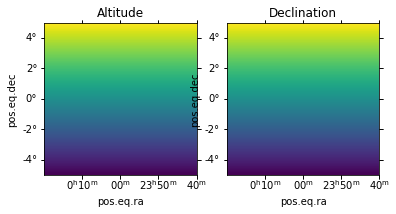

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={"projection": skymap.geom.wcs})
axes[0].imshow(altaz_north.alt.deg)
axes[0].set_title("Altitude")
axes[1].imshow(coords.dec.deg)
axes[1].set_title("Declination");

Text(0.5, 1.0, 'Right Ascention')

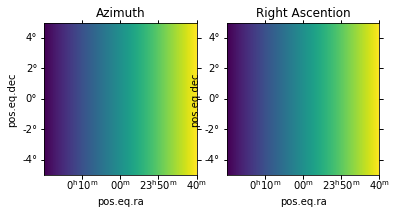

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={"projection": skymap.geom.wcs})
axes[0].imshow(altaz_north.az.wrap_at("180d").deg)
axes[0].set_title("Azimuth")
axes[1].imshow(-coords.ra.wrap_at("180d").deg)
axes[1].set_title("Right Ascention")

In [9]:
altaz_south = coords.transform_to(AltAz(obstime=time, location=south_pole))

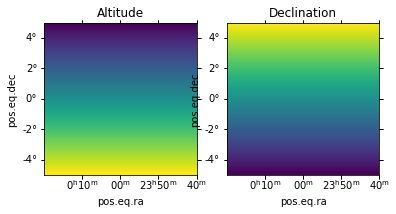

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={"projection": skymap.geom.wcs})
axes[0].imshow(altaz_south.alt.deg)
axes[0].set_title("Altitude")
axes[1].imshow(coords.dec.deg)
axes[1].set_title("Declination");

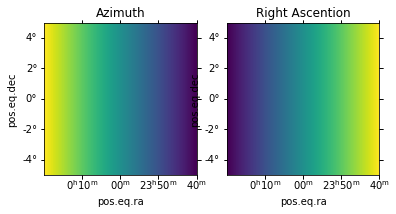

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={"projection": skymap.geom.wcs})
axes[0].imshow(altaz_south.az.deg)
axes[0].set_title("Azimuth")
axes[1].imshow(-coords.ra.wrap_at("180d").deg)
axes[1].set_title("Right Ascention");

Yeah!